# Numerical Bifurcation Analysis of Large Scale Systems: HW6

In [9]:
%matplotlib inline
from nbaolss import *
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib import animation

## 1) The linearized case with sinusoidal forcing
 First we are to analytically solve the time dependent linear Ginzburg-Landau equation with sinusoidal forcing, which is given by
 $$\dfrac{\partial u}{\partial t} = \dfrac{\partial^2 u}{\partial x^2} + \mu u + 0.01\sin (\pi x),$$
 with initial condition $u(x, 0) = \epsilon \sin (\pi x)$ and $\mu$ smaller and bigger than the first bifurcation point $\mu = \pi^2$.
 
 To do so, we assume that a solution of the form $u(x,t) = c(t) \sin (\pi x)$ exists for some function $c(\cdot)$ for which it holds that $c(0) = 1$. Then, using the linear PDE, we get that
 $$\dfrac{\partial u}{\partial t} = c'(t)\sin(\pi x), \quad \dfrac{\partial^2 u}{\partial x^2} = -\pi^2c(t)\sin(\pi x).$$
 
 Filling this in the PDE, yields
 $$\sin(\pi x)(c'(t) + (\pi^2 - \mu)c(t) - 0.01) = 0$$
 So we recover the following inhomogenous differential equation for $c(\cdot)$:
 $$c'(t) = -(\pi^2 - \mu)c(t) + 0.01, \quad c(0) = 1.$$
 Then, 
 \begin{itemize}
 \item If $\pi^2 - \mu < 0$, then the constant in front of $c$ is positive, so we get that the solution diverges from zero, i.e. it is unstable.
 \item If $\pi^2 - \mu > 0$, then the constant in front of $c$ is negative, so we get that the solution of the homogenous equation converges to zero, but due to the forcing term, the solution to the inhomogeneous equation converges to some nonzero function
 \end{itemize}


## 2) Time integration using backward Euler

Consider the system of ODEs
$$\dfrac{\mathrm{d}}{\mathrm{d}x}u = f(u, t)$$
We are going to use the Backward Euler implicit scheme to numerically solve this system. For each time point, we have in that
$$u^{(n+1)} = u^{(n)} + \Delta t f(u^{(n+1)}, t^{(n+1)})$$
It is more convenient to write this as a root finding problem, so we can directly apply our Newton function, this yields
$$g(u, t) = u - u^{(n)} - \Delta t f(u, t^{(n+1)})$$
To find our new value, we will have to find a zero of $g$, this zero will be the value of the function at $t + \Delta t$.

We use the backward Euler method to solve the time-dependent GL equation using the method-of-(vertical)-lines.

In [2]:
# Function to implement the backward Euler method
def backward_euler(u0, t_vals, func, jac, tol, max_iter):
    dt = t_vals[1] - t_vals[0]
    u_vals = np.empty((len(t_vals), len(u0)))
    u_vals[0, :] = u0

    for time in range(len(t_vals) - 1):
        g = lambda u: u - u_vals[time, :] - dt * func(u, t_vals[time + 1])
        g_jac = lambda u: - dt * jac(u, t_vals[time]) + scipy.sparse.eye(len(u0))
        u_vals[time + 1, :], _ = newton(u_vals[time, :], g, g_jac, tol, max_iter)
    return u_vals

Text(0, 0.5, '$u$')

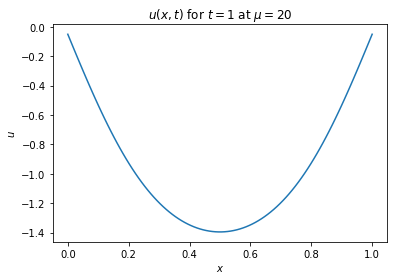

In [21]:
epsilon = 0.01
mu_start = 0
mu_end = 20
steps = 300
size = 100
mu_pts_0_20 = np.linspace(mu_start, mu_end, steps)
u0 = -forcing_cont(mu_start, np.zeros(size), mu_end, steps, epsilon)[-1]

final_time = 1
dt = 0.01
size_time = round(final_time / dt)
t_vals = np.linspace(0, final_time, size_time)

length = 1
dx = 0.01
size_space = round(length / dx)
x_grid = np.linspace(0, length, size_space)

mu = 20
tol = 1e-6
max_iter = 15

forcing_GL1 = lambda u, t: forcing_fGL1(u, size_space, mu, epsilon)
jac_forcing_GL1 = lambda u, t: JacGL1(u, size_space, mu)

# After only a few time steps we are on the isolated branch
res = backward_euler(u0, t_vals, forcing_GL1, jac_forcing_GL1, tol, max_iter)
plt.plot(x_grid, res[-1, :])
plt.title(r"$u(x,t)$ for $t=1$ at $\mu=20$")
plt.xlabel(r"$x$")
plt.ylabel(r"$u$")

## 3) Behaviour before and after the first bifurcation.
\begin{itemize}
\item $\mu = 8$: In this case we're before the bifurcation, so there exists only the stable branch. In this case we see that we converge to the function $0.01 \sin (\pi x)$
\item $\mu = 11$: In this case we're after the bifurcation, so now the previous branch has become unstable and as time progresses we converge to the new stable branch.
\end{itemize}

Text(20.75, 0.5, '$u$')

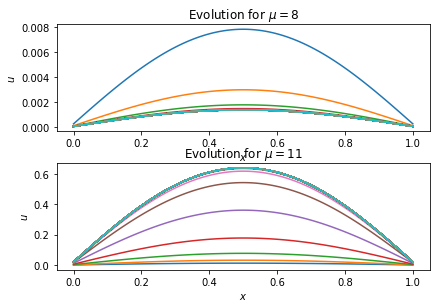

In [24]:
final_time = 5
dt = 0.01
size_time = round(final_time / dt)
t_vals = np.linspace(0, final_time, size_time)

length = 1
dx = 0.01
size_space = round(length / dx)
x_grid = np.linspace(0, length, size_space)

# u(x, 0) = 0.01 sin(\pi x)
u0 = 0.01 * np.sin(np.pi * x_grid)

mu = 8
tol = 1e-6
max_iter = 15
epsilon = 0.01

forcing_GL1 = lambda u, t: forcing_fGL1(u, size_space, mu, epsilon)
jac_forcing_GL1 = lambda u, t: JacGL1(u, size_space, mu)

u_vals_8 = backward_euler(u0, t_vals, forcing_GL1, jac_forcing_GL1, tol, max_iter)

mu = 11
forcing_GL1 = lambda u, t: forcing_fGL1(u, size_space, mu, epsilon)
jac_forcing_GL1 = lambda u, t: JacGL1(u, size_space, mu)
u_vals_11 = backward_euler(u0, t_vals, forcing_GL1, jac_forcing_GL1, tol, max_iter)

fig, axs = plt.subplots(2)
fig.tight_layout()
for time in range(round(size_time / 5)):
    axs[0].plot(x_grid, u_vals_8[5 * time, :])
    axs[1].plot(x_grid, u_vals_11[5 * time, :])
axs[0].set_title(r"Evolution for $\mu = 8$")
axs[0].set_xlabel(r"$x$")
axs[0].set_ylabel(r"$u$")

axs[1].set_title(r"Evolution for $\mu = 11$")
axs[1].set_xlabel(r"$x$")
axs[1].set_ylabel(r"$u$")